# Plan

1. **Agglomerative Clustering**  
   - Complete linkage  
   - Single linkage  

2. **DBSCAN**  
   - Density-based clustering and noise detection

3. **KMeans with Elbow Method**  
   - Use the Elbow method to find the optimal number of clusters
   - Final KMeans clustering based on the best k

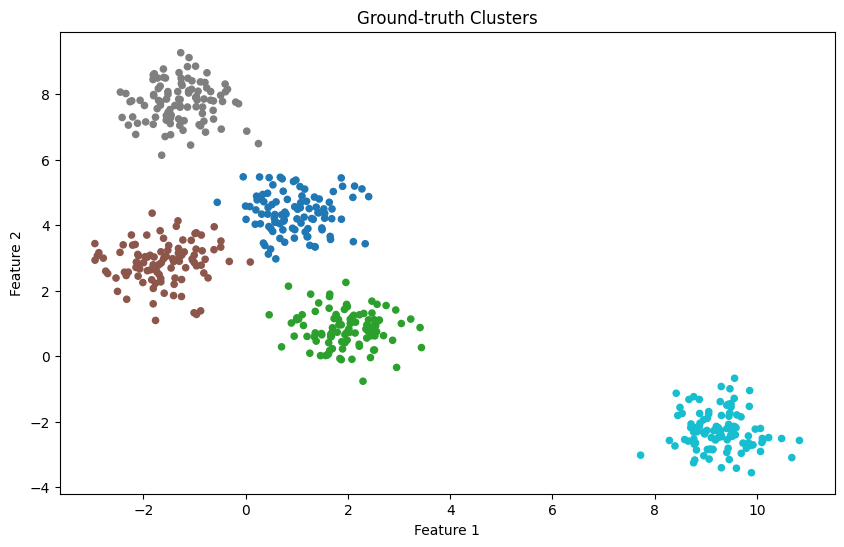

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# Generate data
X, y_true = make_blobs(n_samples=500, n_features=2,
                       centers=5, cluster_std=0.6, random_state=0)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='tab10', s=20)
plt.title('Ground-truth Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette Score (Complete linkage): 0.691


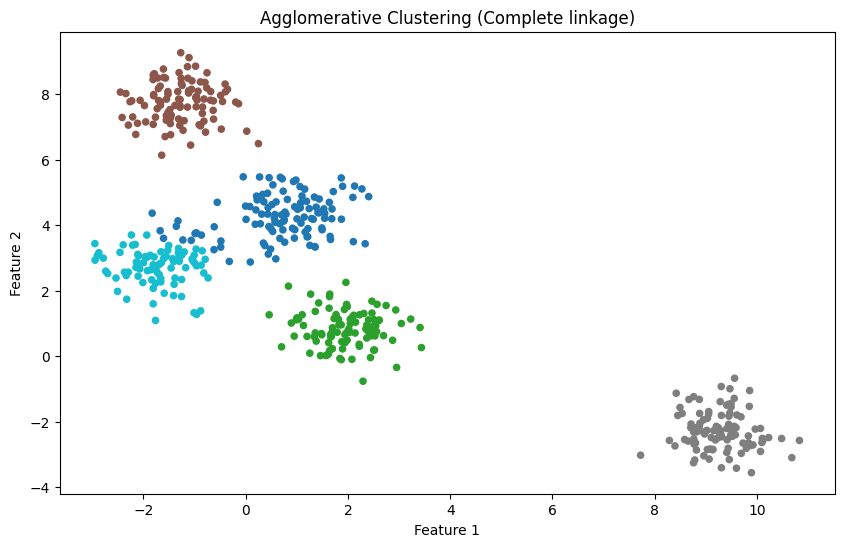

In [53]:
# Agglomerative Clustering: Complete linkage
hc_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
labels_complete = hc_complete.fit_predict(X)

sil_complete = silhouette_score(X, labels_complete)
print(f"Silhouette Score (Complete linkage): {sil_complete:.3f}")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=labels_complete, cmap='tab10', s=20)
plt.title('Agglomerative Clustering (Complete linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Silhouette Score (Single linkage): 0.561


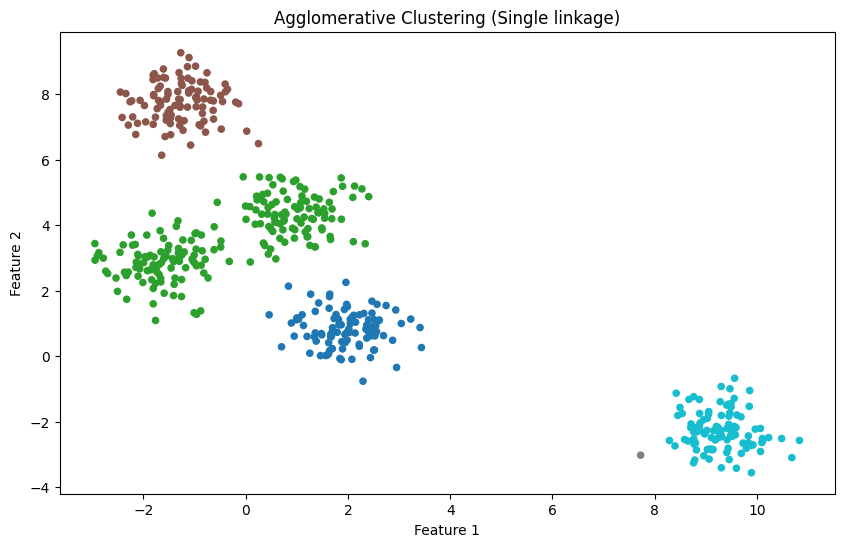

In [55]:
# Agglomerative Clustering: Single linkage
hc_single = AgglomerativeClustering(n_clusters=5, linkage='single')
labels_single = hc_single.fit_predict(X)

sil_single = silhouette_score(X, labels_single)
print(f"Silhouette Score (Single linkage): {sil_single:.3f}")

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=labels_single, cmap='tab10', s=20)
plt.title('Agglomerative Clustering (Single linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

DBSCAN: number of clusters = 5, noise points = 17
Silhouette Score (DBSCAN): 0.732


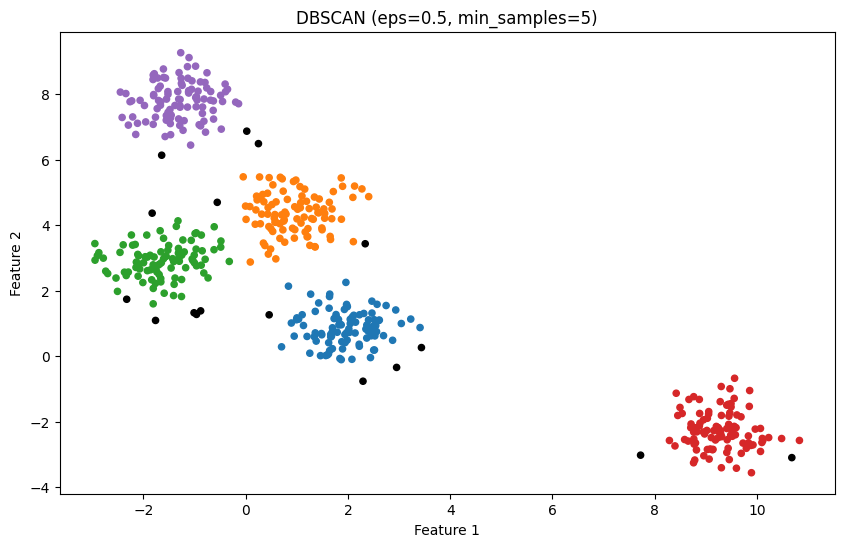

In [56]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X)

n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = list(labels_db).count(-1)

print(f"DBSCAN: number of clusters = {n_clusters_db}, noise points = {n_noise_db}")

mask_db = labels_db != -1
if n_clusters_db > 1:
    sil_db = silhouette_score(X[mask_db], labels_db[mask_db])
    print(f"Silhouette Score (DBSCAN): {sil_db:.3f}")
else:
    print("Silhouette Score (DBSCAN): cannot compute for less than 2 clusters")

plt.figure(figsize=(10,6))
colors = plt.cm.tab10(np.mod(labels_db, 10))
colors[labels_db == -1] = (0, 0, 0, 1)
plt.scatter(X[:,0], X[:,1], c=colors, s=20)
plt.title('DBSCAN (eps=0.5, min_samples=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Best k according to Silhouette Score = 5


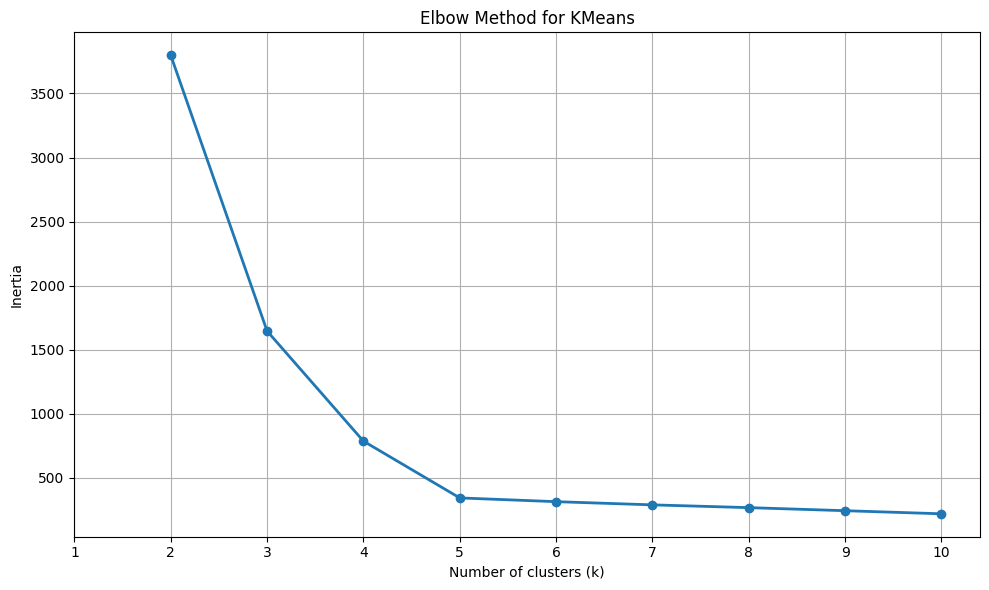

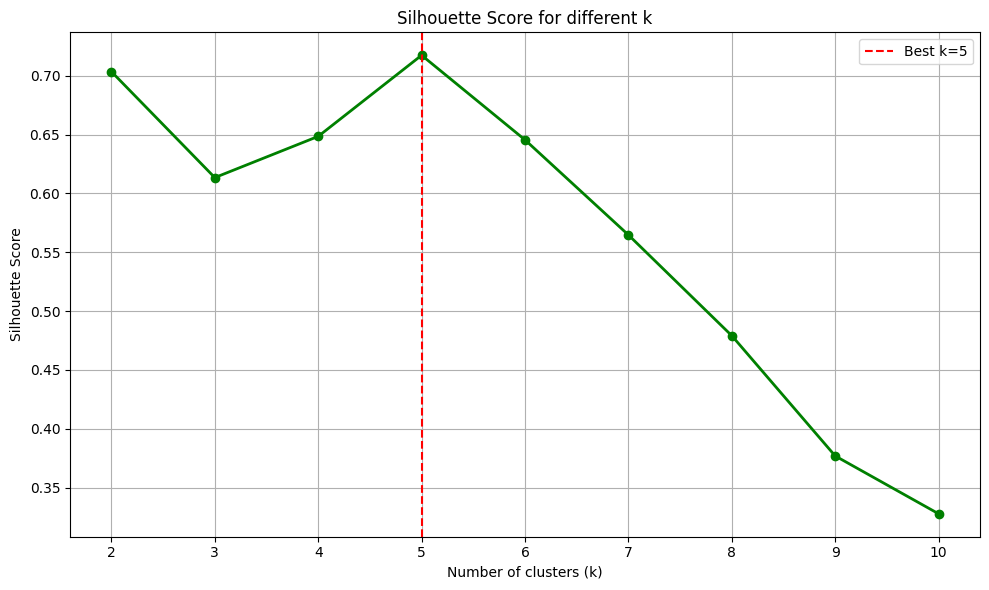

Silhouette Score (k=5): 0.717


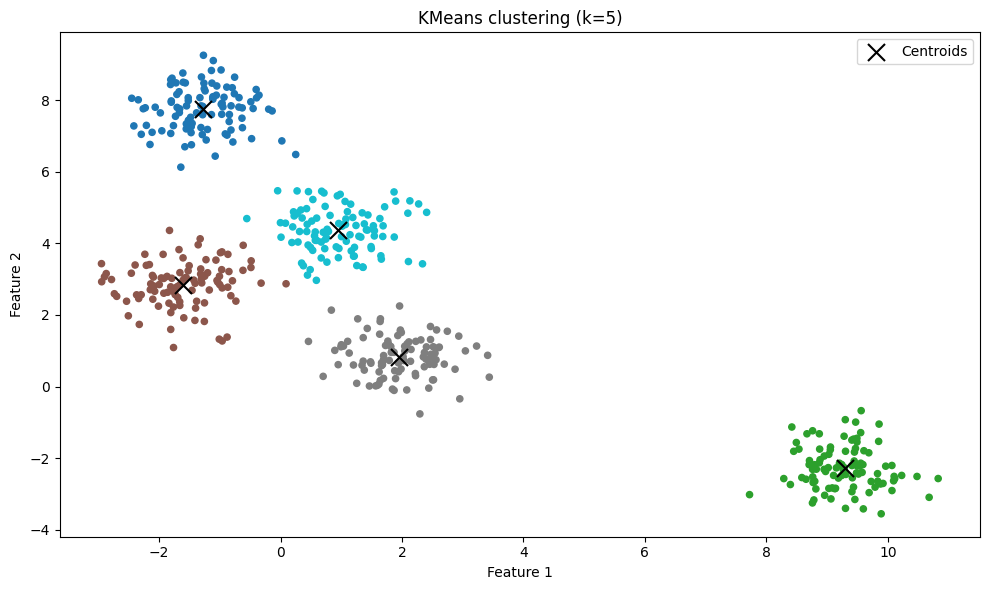

In [63]:
# Calculate inertia and silhouette scores
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find best k according to Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k according to Silhouette Score = {best_k}")

# Plot Inertia (Elbow method)
plt.figure(figsize=(10,6))
plt.plot([1] + list(K_range), [np.nan] + inertias, 'o-', linewidth=2)  # k=1 is nan for inertia
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10,6))
plt.plot(K_range, silhouette_scores, 'o-', linewidth=2, color='green')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# KMeans clustering using best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=0)
labels_final = kmeans_final.fit_predict(X)

final_silhouette = silhouette_score(X, labels_final)
print(f"Silhouette Score (k={best_k}): {final_silhouette:.3f}")

# Clustering Visualization
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_final, cmap='tab10', s=20)
plt.scatter(kmeans_final.cluster_centers_[:, 0],
            kmeans_final.cluster_centers_[:, 1],
            c='black', marker='x', s=150, label='Centroids')
plt.title(f'KMeans clustering (k={best_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions

#### 1. Agglomerative Clustering (Complete linkage)
- Complete linkage successfully recovered the original cluster structure.
- The clusters are well-separated and compact.
- The Silhouette Score was relatively high, indicating good clustering performance.

#### 2. Agglomerative Clustering (Single linkage)
- Single linkage showed weaker results due to the *chaining effect* — clusters became elongated and merged incorrectly.
- The Silhouette Score was lower compared to complete linkage.

#### 3. DBSCAN
- DBSCAN effectively detected the main clusters without needing to predefine the number of clusters.
- It also identified noise points (marked in black), which is a strength when dealing with non-standard or noisy datasets.

#### 4. KMeans (Elbow method + Silhouette Score)
- The Elbow method suggested an optimal number of clusters around **k=5**.
- The Silhouette Score was also maximized at **k=5**, confirming the choice.
- Final KMeans clustering with **k=5** produced compact and well-separated clusters.